In [82]:
import _init_paths
import caffe
import surgery, score
import numpy as np
import os

In [23]:
ls

caffemodel-url      solve.sh*
_init_paths.py      test_how_score_works.ipynb
_init_paths.pyc     train.prototxt
logs/               train.prototxt~
net.py              transplant caffemodel to FCN versioni.ipynb
snapshot/           val.prototxt
solve_ori.prototxt  val.prototxt~
solve.py*           VGG16.prototxt
solver.prototxt


In [25]:
weights = 'snapshot/train_iter_8000.caffemodel'

In [26]:
caffe.set_device(1)
caffe.set_mode_gpu()

solver = caffe.SGDSolver('solver.prototxt')
solver.net.copy_from(weights)
interp_layers = [k for k in solver.net.params.keys() if 'up' in k]
surgery.interp(solver.net, interp_layers)
val = np.loadtxt('../data/vaihingen/val.txt', dtype=str)

In [27]:
solver.test_nets[0].share_with(solver.net)

In [28]:
net = solver.test_nets[0]

In [50]:
net.forward()

{'loss': array(3904.532958984375, dtype=float32)}

In [51]:
print net.blobs['score'].data.shape
print net.blobs['label'].data.shape

(1, 6, 129, 234)
(1, 1, 129, 234)


In [98]:
net.forward()
out = net.blobs['score'].data[0].argmax(0)
gt = net.blobs['label'].data[0,0]

### Original image

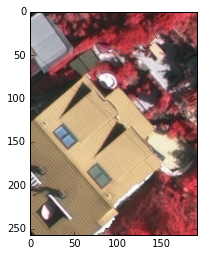

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im_path = os.path.join(net.layers[0].vai_dir,
                       'top_crop',
                       str(net.layers[0].indices[net.layers[0].idx - 1]))
img=mpimg.imread(im_path)
imgplot = plt.imshow(img)


### ground truth label

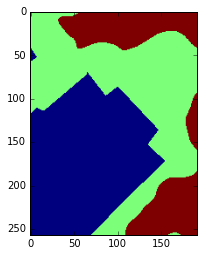

In [100]:
gtplot = plt.imshow(gt)

### predict label

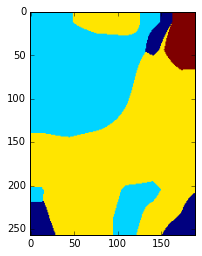

In [97]:
outplot = plt.imshow(out)

In [49]:
print out.shape
print gt.shape

(257, 192)
(257, 192)
